# Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import os
import PIL
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

# Dataset Loading and Splitting

Split-folders library was used to split the dataset into three parts: Training set(70%), Validation set(15%), and Test set(15%).

In [2]:
base_ds = 'C:/Users/khushi/OneDrive/Desktop/Project2/content/Monuments'
base_ds = pathlib.Path(base_ds)

In [5]:
# !pip install split-folders

In [25]:
# import splitfolders
# splitfolders.ratio(base_ds, output='C:/Users/khushi/OneDrive/Desktop/Project2/content/imgs', seed=123, ratio=(.7,.15,.15), group_prefix=None)




Copying files: 0 files [00:00, ? files/s]


Copying files: 1 files [00:00,  1.95 files/s]


Copying files: 20 files [00:00, 42.76 files/s]


Copying files: 50 files [00:00, 101.61 files/s]


Copying files: 82 files [00:00, 155.86 files/s]


Copying files: 108 files [00:00, 183.01 files/s]


Copying files: 134 files [00:01, 203.56 files/s]


Copying files: 174 files [00:01, 258.21 files/s]


Copying files: 221 files [00:01, 318.61 files/s]


Copying files: 266 files [00:01, 356.61 files/s]


Copying files: 305 files [00:01, 348.74 files/s]


Copying files: 342 files [00:01, 339.79 files/s]


Copying files: 378 files [00:01, 329.64 files/s]


Copying files: 418 files [00:01, 337.13 files/s]


Copying files: 453 files [00:01, 339.16 files/s]


Copying files: 488 files [00:02, 326.10 files/s]


Copying files: 522 files [00:02, 300.85 files/s]


Copying files: 553 files [00:02, 278.78 files/s]


Copying files: 586 files [00:02, 280.06 files/s]


Copying files: 619 files [00:02, 282.11 fi

Copying files: 8757 files [00:32, 253.29 files/s]


Copying files: 8784 files [00:32, 254.21 files/s]


Copying files: 8819 files [00:33, 269.17 files/s]


Copying files: 8852 files [00:33, 284.31 files/s]


Copying files: 8882 files [00:33, 246.92 files/s]


Copying files: 8912 files [00:33, 256.26 files/s]


Copying files: 8944 files [00:33, 263.24 files/s]


Copying files: 8975 files [00:33, 273.75 files/s]


Copying files: 9004 files [00:33, 277.30 files/s]


Copying files: 9033 files [00:33, 249.09 files/s]


Copying files: 9063 files [00:33, 261.46 files/s]


Copying files: 9093 files [00:34, 271.46 files/s]


Copying files: 9121 files [00:34, 273.01 files/s]


Copying files: 9149 files [00:34, 217.31 files/s]


Copying files: 9177 files [00:34, 229.19 files/s]


Copying files: 9209 files [00:34, 242.96 files/s]


Copying files: 9235 files [00:34, 236.86 files/s]


Copying files: 9260 files [00:34, 198.96 files/s]


Copying files: 9282 files [00:34, 201.31 files/s]


Copying file

Copying files: 15911 files [01:05, 197.31 files/s]


Copying files: 15935 files [01:05, 200.79 files/s]


Copying files: 15956 files [01:06, 178.91 files/s]


Copying files: 15978 files [01:06, 188.00 files/s]


Copying files: 15998 files [01:06, 184.05 files/s]


Copying files: 16030 files [01:06, 219.77 files/s]


Copying files: 16053 files [01:06, 213.71 files/s]


Copying files: 16075 files [01:06, 205.18 files/s]


Copying files: 16100 files [01:06, 216.61 files/s]


Copying files: 16133 files [01:06, 238.10 files/s]


Copying files: 16157 files [01:06, 229.14 files/s]


Copying files: 16181 files [01:07, 221.41 files/s]


Copying files: 16216 files [01:07, 255.36 files/s]


Copying files: 16242 files [01:07, 237.59 files/s]


Copying files: 16267 files [01:07, 212.43 files/s]


Copying files: 16289 files [01:07, 182.66 files/s]


Copying files: 16313 files [01:07, 188.50 files/s]


Copying files: 16333 files [01:07, 170.79 files/s]


Copying files: 16353 files [01:07, 176.99 file

Copying files: 22732 files [01:38, 248.25 files/s]


Copying files: 22758 files [01:38, 250.74 files/s]


Copying files: 22787 files [01:38, 260.25 files/s]


Copying files: 22814 files [01:38, 217.61 files/s]


Copying files: 22841 files [01:38, 226.71 files/s]


Copying files: 22871 files [01:38, 245.07 files/s]


Copying files: 22903 files [01:38, 256.10 files/s]


Copying files: 22930 files [01:38, 221.42 files/s]


Copying files: 22959 files [01:38, 235.67 files/s]


Copying files: 22995 files [01:39, 258.78 files/s]


Copying files: 23024 files [01:39, 266.00 files/s]


Copying files: 23058 files [01:39, 285.72 files/s]


Copying files: 23088 files [01:39, 255.80 files/s]


Copying files: 23115 files [01:39, 256.40 files/s]


Copying files: 23155 files [01:39, 283.14 files/s]


Copying files: 23184 files [01:40, 136.33 files/s]


Copying files: 23212 files [01:40, 156.14 files/s]


Copying files: 23235 files [01:40, 169.29 files/s]


Copying files: 23258 files [01:40, 161.22 file

# Dataset Exploration

Now we will explore the dataset in order to get the total number of images,total number of classes, and number of images in each classes.
First we will get the find of images with jpeg extesion and will create a list for the same for all monuments.
We will call a for loop in order to calculate the number of classes and images

In [3]:
Fatehpur_Sikri = [fn for fn in os.listdir(f'{base_ds}\Fatehpur_Sikri') if fn.endswith('.jpeg')]
Golden_Temple = [fn for fn in os.listdir(f'{base_ds}\Golden_Temple') if fn.endswith('.jpeg')]
Jagannath_Temple = [fn for fn in os.listdir(f'{base_ds}\Jagannath_Temple') if fn.endswith('.jpeg')]
Qutub_Minar = [fn for fn in os.listdir(f'{base_ds}\Qutub_Minar') if fn.endswith('.jpeg')]
Rani_Ki_Vav = [fn for fn in os.listdir(f'{base_ds}\Rani_Ki_Vav') if fn.endswith('.jpeg')]
Sanchi_Stupa = [fn for fn in os.listdir(f'{base_ds}\Sanchi_Stupa') if fn.endswith('.jpeg')]
Taj_Mahal = [fn for fn in os.listdir(f'{base_ds}\Taj_Mahal') if fn.endswith('.jpeg')]
monuments = [Fatehpur_Sikri,Golden_Temple,Jagannath_Temple,Qutub_Minar,Rani_Ki_Vav,Sanchi_Stupa,Taj_Mahal]
monuments_classes = []
for i in os.listdir("C:/Users/khushi/OneDrive/Desktop/Project/content/imgs/train"):
    monuments_classes+=[i]
monuments_classes.sort()

Total images: 26307
Total number of classes: 7
Total Fatehpur_Sikri images: 3737
Total Golden_Temple images: 3707
Total Jagannath_Temple images: 3736
Total Qutub_Minar images: 3740
Total Rani_Ki_Vav images: 3946
Total Sanchi_Stupa images: 3785
Total Taj_Mahal images: 3656


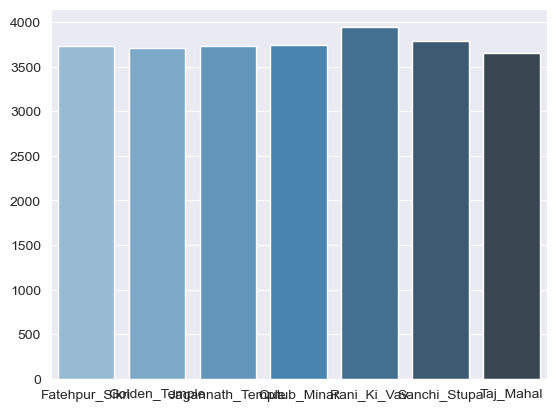

In [4]:
image_count = len(list(base_ds.glob('*/*.jpeg')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(monuments_classes)}')
count = 0
monuments_count = []
for x in monuments_classes:
  print(f'Total {x} images: {len(monuments[count])}')
  monuments_count.append(len(monuments[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=monuments_classes, y=monuments_count, palette="Blues_d")
plt.show()

# Sample Images

We are importing an OpenCV library to process images to identify objects. We will provide a sample image to it and will get dimensions of it.

In [5]:
import cv2

Image dimensions: (600, 1200, 3)


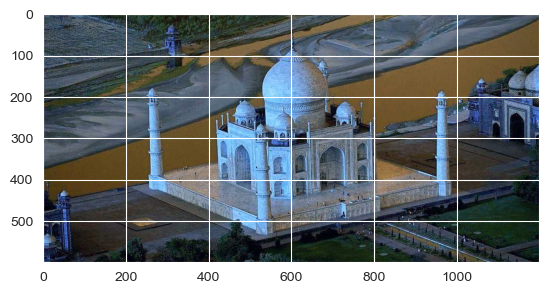

In [6]:
sample_img = cv2.imread("C:/Users/khushi/OneDrive/Desktop/Project2/content/Monuments/Taj_Mahal/Taj Mahal From Different Angles_6.jpeg")
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

We are creating a function called load_random_img to load some random images of all the classes to get a look on the dataset

In [7]:
def load_random_img(dir,label):
    plt.figure(figsize=(10,10))
    i=0
    for label in monuments_classes:
        i+=1
        plt.subplot(1,7,i)
        file = random.choice(os.listdir(f'{dir}/{label}'))
        image_path = os.path.join(f'{dir}/{label}',file)
        img = cv2.imread(image_path)
        plt.title(label)
        plt.imshow(img)
        plt.grid(None)
        plt.axis('off')

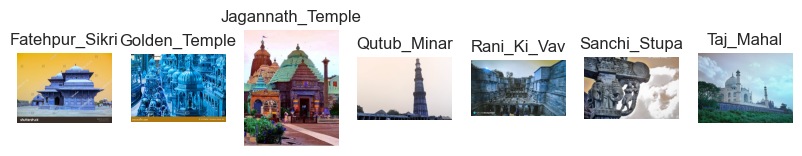

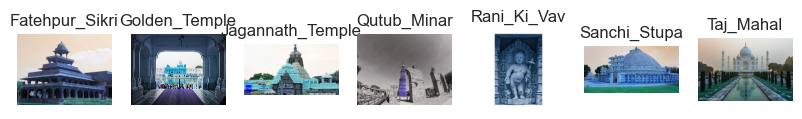

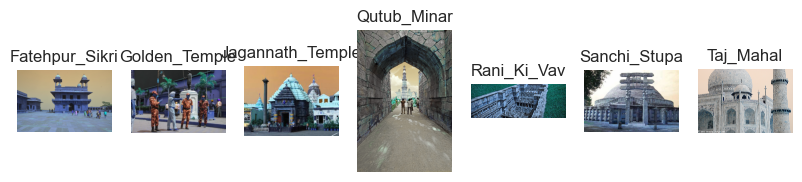

In [8]:
for i in range(3):
    load_random_img(base_ds,monuments_classes)

# Data Pre-processing

In [9]:
batch_size = 64
img_height, img_width = 175,175
input_shape = (img_height, img_width, 3)

We will now normalize the pixel values of the images.
ImageDataGenerator class provided by TensorFlow/Keras that generates batches of augmented images during the training of a neural network.

In [10]:
datagen = ImageDataGenerator(rescale=1./255) # rescaling the pixel value by dividing them by 255 in order to get it's range between 0 and 1

flow_from_directory is used to generate batches of training data. 

target_size: The dimensions to which all images will be resized.

batch_size: The number of samples per batch during training.

subset='training': Specifies that this is the training subset. 

class_mode='categorical': Assumes you have multiple classes, and the labels are one-hot encoded.

In [11]:
train_ds = datagen.flow_from_directory(
    'C:/Users/khushi/OneDrive/Desktop/Project2/content/imgs/train',
    target_size = (img_height,img_width),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical')

val_ds = datagen.flow_from_directory(
    'C:/Users/khushi/OneDrive/Desktop/Project2/content/imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'C:/Users/khushi/OneDrive/Desktop/Project2/content/imgs/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 18779 images belonging to 7 classes.
Found 4021 images belonging to 7 classes.
Found 4031 images belonging to 7 classes.


In [12]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()

# Vanilla CNN Model

Now we will create our first model in order to train the dataset. We will be using Vanilla CNN Model

The first Conv2D layer has 32 filters with a kernel size of (3, 3), using the ReLU activation function. It also specifies the input shape (input_shape) of the images.

Subsequent Conv2D layers has increasing number of filters (32,64,128) and are followed by ReLU activation functions.

Batch normalization is applied after each Conv2D layer. It helps stabilize and accelerate the training of deep neural networks.

Max pooling ois used to downsamplethe spartial dimensions.

Dropout layers are used for regularization to prevent overfitting.

Flatten layer flattens the 3D output to 1D beforing passing it to dense layer.

Fully connected Dense layers are used for classification.

ReLU activation function provides non-linearity to the model enabling the model to learn from the complex model.

The final dense layer has 7 units (assuming a multi-class classification task with 7 classes) and uses the softmax activation function for probability distribution across classes.

In [13]:
model_vanilla = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [14]:
model_vanilla.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vanilla.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 173, 173, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 173, 173, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 173, 173, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 173, 173, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 87, 87, 32)        0         
 D)                                                              
                                                       

The optimizer is responsible for updating the weights of the neueral network during training.

adam refers to the adam optimizer algorithm.

We are choosing it here because of its adaptive learning rate and efficiency in practice.

Categorical_crossentropy computes the cross entropy loass between the predicted value andthe actual value

The summary() method provides a concise overview of the model architecture, displaying information such as the number of parameters in each layer, layer types, and output shapes.

# Callbacks

In [15]:
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

checkpointer = ModelCheckpoint(filepath='saved_models/model_vanilla.hdf5',
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [16]:
history1 = model_vanilla.fit(train_ds, epochs = 2, validation_data = val_ds, callbacks=callbacks)

Epoch 1/2


  1/294 [..............................] - ETA: 1:23:46 - loss: 2.9458 - accuracy: 0.2344

D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


294/294 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.8988
Epoch 1: val_accuracy improved from -inf to 0.37578, saving model to saved_models\model_vanilla.hdf5


D:\Users\khushi\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/294 [==============================] - 1639s 6s/step - loss: 0.3293 - accuracy: 0.8988 - val_loss: 3.4639 - val_accuracy: 0.3758 - lr: 0.0010
Epoch 2/2
294/294 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9757
Epoch 2: val_accuracy improved from 0.37578 to 0.89505, saving model to saved_models\model_vanilla.hdf5
294/294 [==============================] - 1623s 6s/step - loss: 0.0728 - accuracy: 0.9757 - val_loss: 0.4230 - val_accuracy: 0.8951 - lr: 0.0010


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


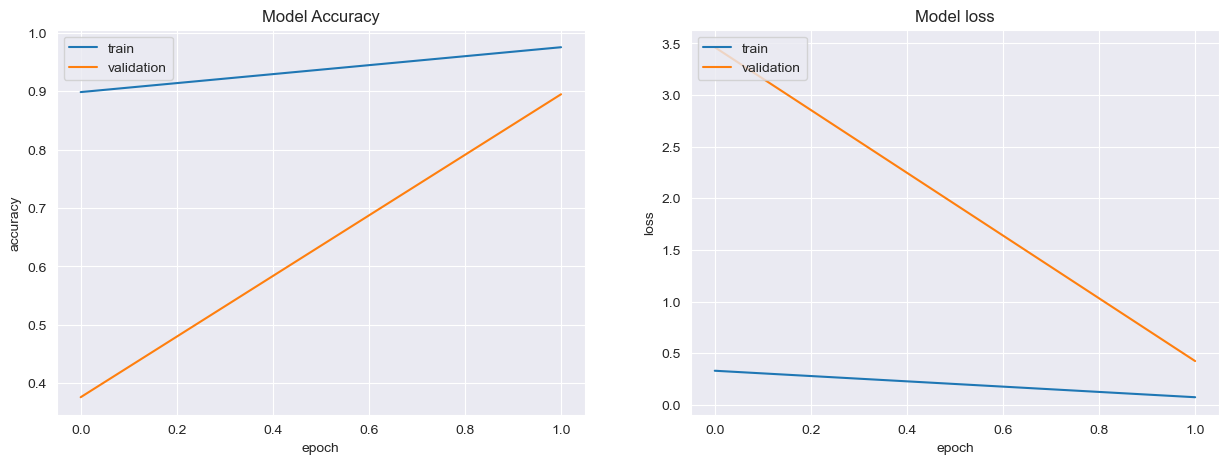

In [17]:
model_vanilla.save("model1")
model_vanilla.load_weights('saved_models/model_vanilla.hdf5')
plot_train_history(history1)

# Evalution of Vanilla CNN Model

In [18]:
score1 = model_vanilla.evaluate(test_ds, verbose=1)

17/63 [=======>......................] - ETA: 1:38 - loss: 0.1123 - accuracy: 0.9540

D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


63/63 [==============================] - 168s 3s/step - loss: 0.4404 - accuracy: 0.8881


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model_vanilla.predict(test_ds)

17/63 [=======>......................] - ETA: 1:40

D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


63/63 [==============================] - 173s 3s/step


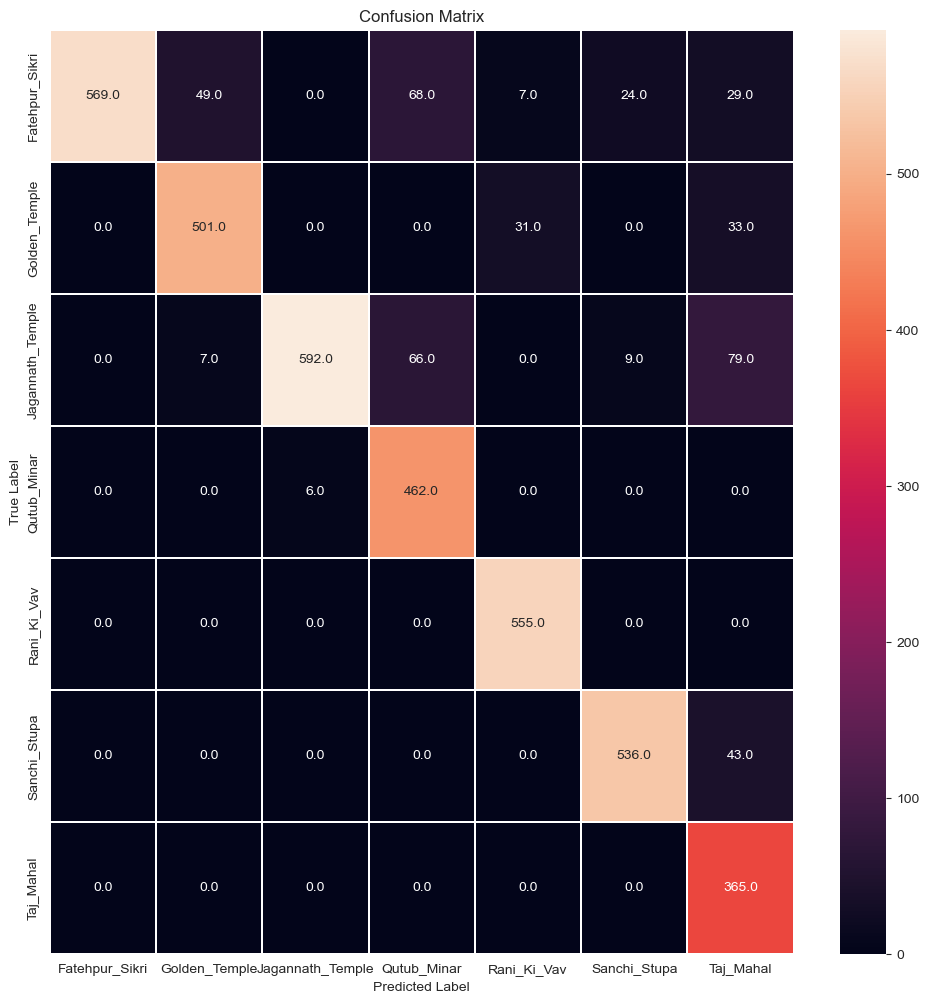

In [20]:
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(monuments_classes)
plt.title("Confusion Matrix")
plt.show()

In [21]:
report1 = classification_report(test_ds.classes, y_pred, target_names=monuments_classes, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

precision    recall  f1-score      support
Fatehpur_Sikri     0.762735  1.000000  0.865399   569.000000
Golden_Temple      0.886726  0.899461  0.893048   557.000000
Jagannath_Temple   0.786189  0.989967  0.876388   598.000000
Qutub_Minar        0.987179  0.775168  0.868421   596.000000
Rani_Ki_Vav        1.000000  0.935919  0.966899   593.000000
Sanchi_Stupa       0.925734  0.942004  0.933798   569.000000
Taj_Mahal          1.000000  0.664845  0.798687   549.000000
accuracy           0.888117  0.888117  0.888117     0.888117
macro avg          0.906937  0.886766  0.886091  4031.000000
weighted avg       0.906759  0.888117  0.886797  4031.000000

# Transfer Learning

In [22]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16.trainable = False
inputs = tf.keras.Input(input_shape)
x = vgg16(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(7, activation='softmax')(x)
model_vgg16 = tf.keras.Model(inputs, x)

In [23]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 175, 175, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 dense_4 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 15247175 (58.16 MB)
Trainable params: 532487 (2.03 MB)
Non-trainable params: 14714688 (56.13 MB)
________________

In [24]:
checkpointer = ModelCheckpoint(filepath='saved_models/model_vgg16.hdf5',
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [25]:
history2 = model_vgg16.fit(train_ds, epochs = 2, validation_data = val_ds, callbacks=callbacks)

Epoch 1/2


D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


294/294 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8893
Epoch 1: val_accuracy improved from -inf to 0.98508, saving model to saved_models\model_vgg16.hdf5


D:\Users\khushi\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/294 [==============================] - 2376s 8s/step - loss: 0.4052 - accuracy: 0.8893 - val_loss: 0.1040 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 2/2
294/294 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 0.9922
Epoch 2: val_accuracy improved from 0.98508 to 0.99130, saving model to saved_models\model_vgg16.hdf5
294/294 [==============================] - 2324s 8s/step - loss: 0.0492 - accuracy: 0.9922 - val_loss: 0.0315 - val_accuracy: 0.9913 - lr: 0.0010


In [26]:
model_vgg16.load_weights('saved_models/model_vgg16.hdf5')

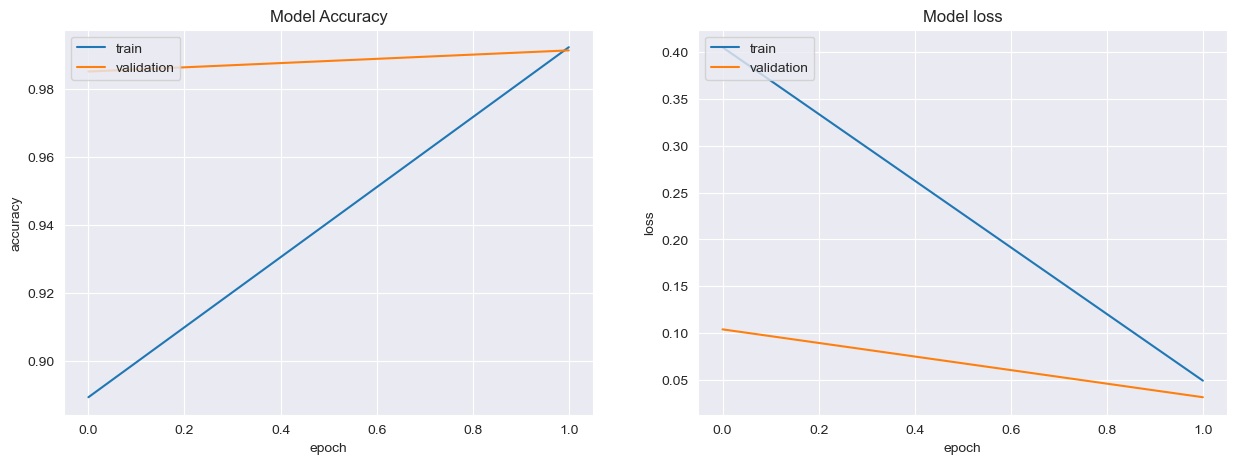

In [27]:
plot_train_history(history2)

In [28]:
score2 = model_vgg16.evaluate(test_ds, verbose=1)
print(f'Model 1 Vanilla Loss: {score1[0]}, Accuracy: {score1[1]*100}')
print(f'Model 2 VGG16 Loss: {score2[0]}, Accuracy: {score2[1]*100}')
model_vgg16.save("model2")

63/63 [==============================] - 408s 6s/step - loss: 0.0326 - accuracy: 0.9918
Model 1 Vanilla Loss: 0.4404483735561371, Accuracy: 88.81170749664307
Model 2 VGG16 Loss: 0.03256971016526222, Accuracy: 99.18134212493896
INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


# Fine Tuning

In [29]:
tf.config.run_functions_eagerly(True)

In [30]:
vgg16.trainable = True
model_vgg16.compile(optimizer=keras.optimizers.Adam(1e-5),loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)

In [31]:
history3 = model_vgg16.fit(train_ds, epochs = 2, validation_data = val_ds, callbacks=callbacks)

Epoch 1/2


D:\Users\khushi\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


  1/294 [..............................] - ETA: 2:11:32 - loss: 0.0762 - accuracy: 0.9688

D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


294/294 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9936 
Epoch 1: val_accuracy improved from 0.99130 to 0.99154, saving model to saved_models\model_vgg16.hdf5


D:\Users\khushi\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/294 [==============================] - 6329s 22s/step - loss: 0.0134 - accuracy: 0.9936 - val_loss: 0.0108 - val_accuracy: 0.9915 - lr: 1.0000e-05
Epoch 2/2
294/294 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9925 
Epoch 2: val_accuracy improved from 0.99154 to 0.99204, saving model to saved_models\model_vgg16.hdf5
294/294 [==============================] - 6220s 21s/step - loss: 0.0101 - accuracy: 0.9925 - val_loss: 0.0105 - val_accuracy: 0.9920 - lr: 1.0000e-05


In [32]:
model_vgg16.load_weights('saved_models/model_vgg16.hdf5')
model_vgg16.save("model3")

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


# Final Evalution

In [33]:
score3 = model_vgg16.evaluate(test_ds, verbose=1)
print(f'Model 1 Vanilla Loss: {score1[0]}, Accuracy: {score1[1]*100}')
print(f'Model 2 VGG16 Loss: {score2[0]}, Accuracy: {score2[1]*100}')
print(f'Model 2 VGG16 Fine-tuned Loss: {score3[0]}, Accuracy: {score3[1]*100}')

D:\Users\khushi\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/63 [======>.......................] - ETA: 5:19 - loss: 3.6394e-05 - accuracy: 1.0000

D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


63/63 [==============================] - 450s 7s/step - loss: 0.0115 - accuracy: 0.9916
Model 1 Vanilla Loss: 0.4404483735561371, Accuracy: 88.81170749664307
Model 2 VGG16 Loss: 0.03256971016526222, Accuracy: 99.18134212493896
Model 2 VGG16 Fine-tuned Loss: 0.011459545232355595, Accuracy: 99.15653467178345


In [34]:
Y_pred = model_vgg16.predict(test_ds)

63/63 [==============================] - 449s 7s/step


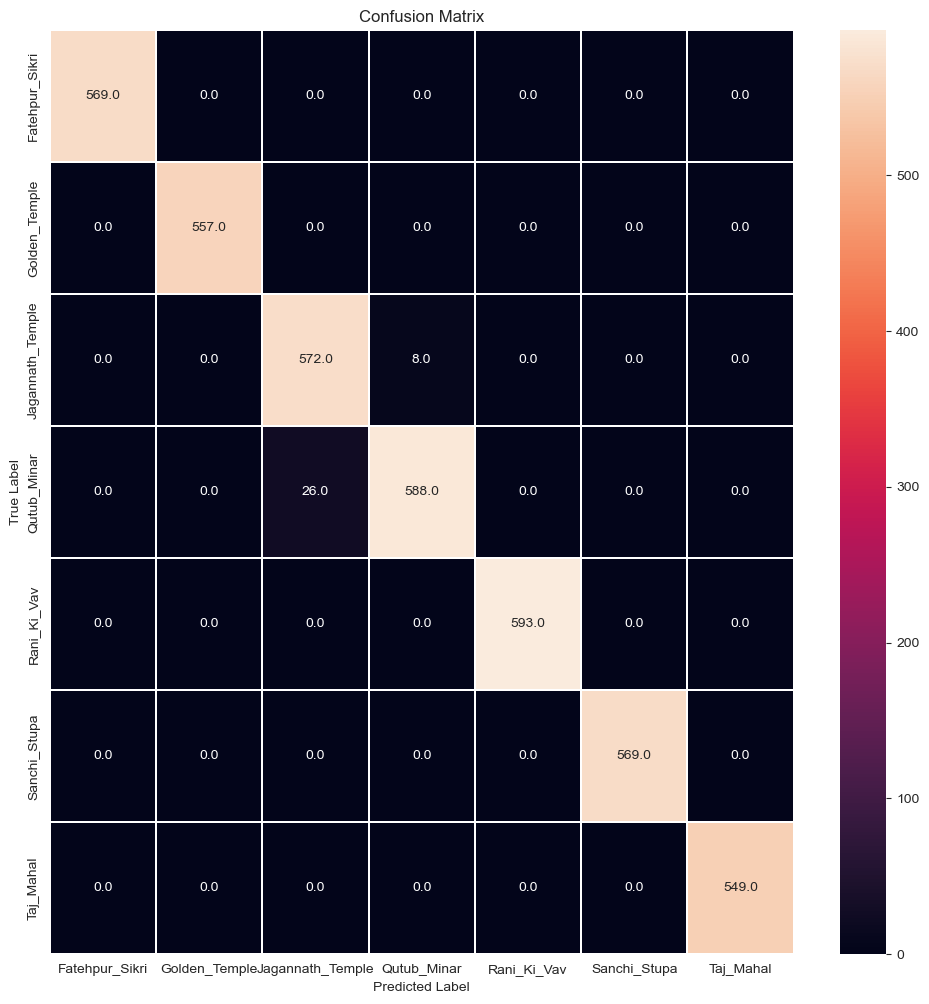

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(monuments_classes)
plt.title("Confusion Matrix")
plt.show()

In [36]:
report2 = classification_report(test_ds.classes, y_pred, target_names=monuments_classes, output_dict=True)
df2 = pd.DataFrame(report1).transpose()
df2

precision    recall  f1-score      support
Fatehpur_Sikri     0.762735  1.000000  0.865399   569.000000
Golden_Temple      0.886726  0.899461  0.893048   557.000000
Jagannath_Temple   0.786189  0.989967  0.876388   598.000000
Qutub_Minar        0.987179  0.775168  0.868421   596.000000
Rani_Ki_Vav        1.000000  0.935919  0.966899   593.000000
Sanchi_Stupa       0.925734  0.942004  0.933798   569.000000
Taj_Mahal          1.000000  0.664845  0.798687   549.000000
accuracy           0.888117  0.888117  0.888117     0.888117
macro avg          0.906937  0.886766  0.886091  4031.000000
weighted avg       0.906759  0.888117  0.886797  4031.000000

In [37]:
plt.figure(figsize=(100, 100))
x, label= train_ds.next()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict = model_vgg16(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label = monuments_classes[np.argmax(score)]
    plt.title(f'Truth: {monuments_classes[result[0][0]]}\nPrediction:{score_label}')
    plt.axis(False)

In [38]:
model_vgg16.save("/content/drive/MyDrive/model")

model_vgg16.save("/content/drive/MyDrive/tensorflow", save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow\assets


In [39]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
     'C:/Users/khushi/OneDrive/Desktop/Project2/content/imgs/test',
    target_size=(175, 175),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model_vgg16.evaluate(test_generator, steps=len(test_generator))
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


Found 4031 images belonging to 7 classes.


D:\Users\khushi\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


126/126 [==============================] - 443s 3s/step - loss: 0.0115 - accuracy: 0.9916
Test loss: 0.011459550820291042
Test accuracy: 0.9915653467178345


In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('C:/Users/khushi/OneDrive/Desktop/Project2/model3')


#Load and preprocess the input image
img_path = "C:/Users/khushi/OneDrive/Desktop/Project2/content/Monuments/Taj_Mahal/Taj Mahal From Different Angles_132.jpeg"
img = image.load_img(img_path, target_size=(175,175))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Make predictions on the input image
predictions = model.predict(img)
class_labels = ['Fatehpur_Sikri','Golden_Temple','Jagannath_Temple','Qutub_Minar','Rani_Ki_Vav','Sanchi_Stupa','Taj_Mahal']

# Set the threshold for minimum accuracy
threshold = 0.9

# Get the predicted class label and accuracy
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
accuracy = predictions[0][predicted_class_index]

# Check if accuracy is below the threshold for all classes
if all(accuracy < threshold for accuracy in predictions[0]):
    print("This location is not in our database.")
else:
    print('Predicted class:', predicted_class_label)
    print('Accuracy:', accuracy)





1/1 [==============================] - 6s 6s/step
Predicted class: Taj_Mahal
Accuracy: 0.9999608


Found 4031 images belonging to 7 classes.


D:\Users\khushi\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1144/4031 [=======>......................] - ETA: 9:34

D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4031/4031 [==============================] - 795s 197ms/step


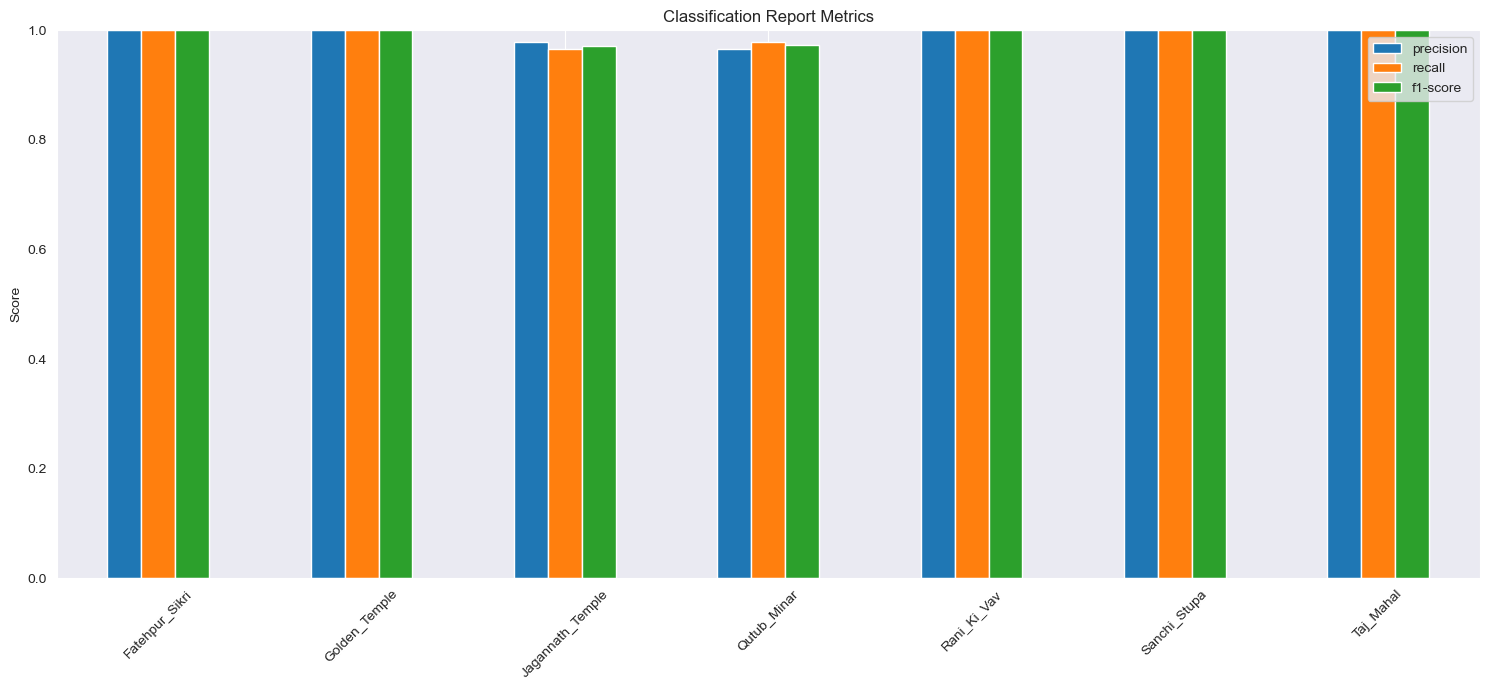

In [41]:
# Import necessary libraries
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Load the pre-trained model
model = load_model('C:/Users/khushi/OneDrive/Desktop/Project2/model2')

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Assuming you rescaled your images during training
test_dir = 'C:/Users/khushi/OneDrive/Desktop/Project2/content/imgs/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(175, 175),  # Adjust if you used a different input size during training
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Predict classes using the model
predictions = model.predict(test_generator, steps=test_generator.n, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels and class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the metrics in the report
report_df[['precision', 'recall', 'f1-score']].drop(['accuracy', 'macro avg', 'weighted avg']).plot(kind='bar', figsize=(15, 7))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Found 4031 images belonging to 7 classes.


D:\Users\khushi\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1144/4031 [=======>......................] - ETA: 9:29

D:\Users\khushi\anaconda3\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4031/4031 [==============================] - 786s 195ms/step
                  precision    recall  f1-score   support

  Fatehpur_Sikri       1.00      1.00      1.00       569
   Golden_Temple       1.00      1.00      1.00       557
Jagannath_Temple       0.99      0.96      0.97       598
     Qutub_Minar       0.96      0.99      0.97       596
     Rani_Ki_Vav       1.00      1.00      1.00       593
    Sanchi_Stupa       1.00      1.00      1.00       569
       Taj_Mahal       1.00      1.00      1.00       549

        accuracy                           0.99      4031
       macro avg       0.99      0.99      0.99      4031
    weighted avg       0.99      0.99      0.99      4031



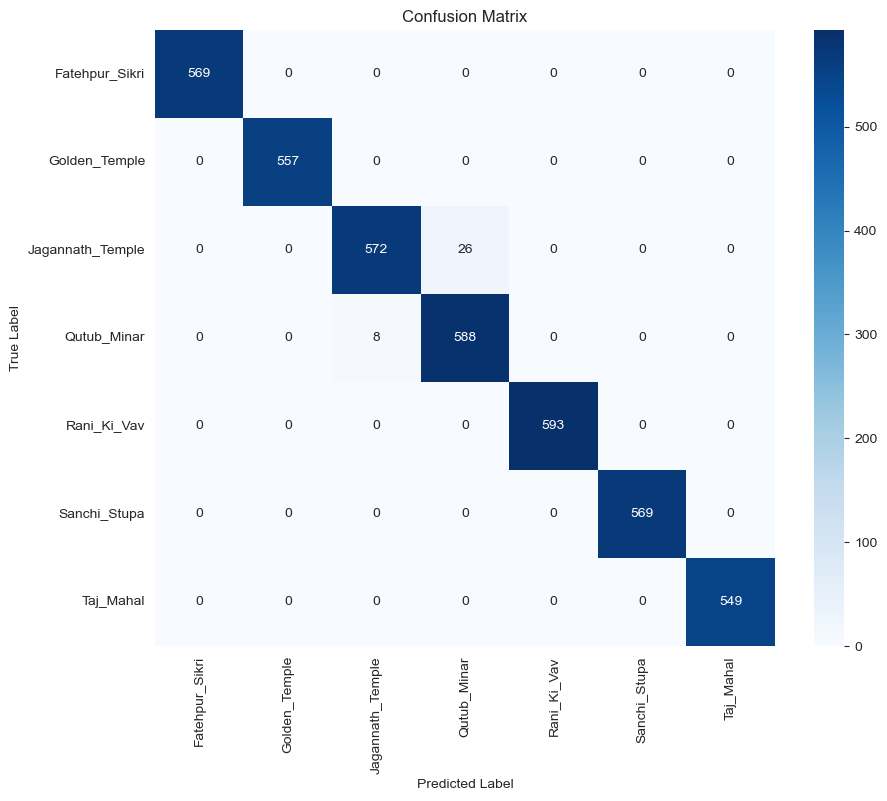

In [42]:
#Import necessary libraries
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained model
model = load_model('C:/Users/khushi/OneDrive/Desktop/Project2/model3')

# Preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Assuming you rescaled your images during training
test_dir = 'C:/Users/khushi/OneDrive/Desktop/Project2/content/imgs/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(175, 175),  # Adjust if you used a different input size during training
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Predict classes using the model
predictions = model.predict(test_generator, steps=test_generator.n, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels and class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()